<a href="https://colab.research.google.com/github/kartiksarvaiaya/kartik_project/blob/main/bandreject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mne


In [3]:
import numpy as np
import seaborn as sns
import os
import mne
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.layers import Dense, Activation, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Flatten, Dropout, BatchNormalization, Input,UpSampling1D, TimeDistributed
from tensorflow.keras.layers import concatenate, Lambda, Conv2D, MaxPooling2D, GlobalAveragePooling2D,LSTM
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
from google.colab import drive
drive.mount('/content/drive')
folder = '/content/drive/MyDrive/kartik_imagined_speech/Char'

Mounted at /content/drive


In [5]:
X = np.zeros((230, 14, 1280))
Y = np.zeros((230,))
ctr = 0

for filename in os.listdir(folder):
    filepath = os.path.join(folder, filename)
    data = mne.io.read_raw_edf(filepath)
    raw_data = data[2:16][0] * 1000
    raw_data = raw_data[:, 0:1280]

    # Extract class label from filename
    _, cls = filename.split('_')
    label_mapping = {'A': 0, 'C': 1, 'F': 2, 'H': 3, 'J': 4, 'M': 5, 'P': 6, 'S': 7, 'T': 8, 'Y': 9}
    Y[ctr] = label_mapping.get(cls[0], -1)  # -1 for unknown classes

    X[ctr, :, :] = raw_data
    ctr += 1

Extracting EDF parameters from /content/drive/MyDrive/kartik_imagined_speech/Char/Pradeep_P.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/kartik_imagined_speech/Char/Pradeep_S.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/kartik_imagined_speech/Char/Pradeep_H.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/kartik_imagined_speech/Char/Pradeep_A.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/kartik_imagined_speech/Char/Pradeep_Y.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/kartik_imagined_speech/Char/Pradeep_

In [6]:
#BANDREJECT

X_bandreject = np.zeros((230,14,1280))
for i in range(0,230):
    for j in range(0,14):
        sig = X[i,j,:]
        output_signal_mne = mne.filter.filter_data(sig, 128, l_freq=15, h_freq=4)
        X_bandreject[i,j,:] = output_signal_mne

X_new = np.zeros((36110,32,14))
Y_new = np.zeros((36110,))
npt = 32
stride = 8
ctr = 0
for i in range(0,230):
    y = Y[i]
    a= X_bandreject[i,:,:]
    a = a.transpose()
    val = 0
    while val<=(len(a)-npt):
        x = a[val:val+npt,:]
        X_new[ctr,:,:] = x
        Y_new[ctr] = y
        val = val+stride
        ctr = ctr+1

Streaming output truncated to the last 5000 lines.
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 213 samples (1.664 s)

Setting up band-stop filter from 4 - 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 213 samples (1.664 s)

Setting up band-stop filter from 4 - 15 Hz

FIR filter parameters

Epoch 1/500
181/181 [==============================] - 19s 18ms/step - loss: 2.4272 - accuracy: 0.1382 - val_loss: 2.4209 - val_accuracy: 0.0993
Epoch 2/500
181/181 [==============================] - 2s 11ms/step - loss: 2.2060 - accuracy: 0.1851 - val_loss: 2.3978 - val_accuracy: 0.1166
Epoch 3/500
181/181 [==============================] - 2s 11ms/step - loss: 2.1024 - accuracy: 0.2317 - val_loss: 2.2699 - val_accuracy: 0.1457
Epoch 4/500
181/181 [==============================] - 2s 11ms/step - loss: 1.9843 - accuracy: 0.2818 - val_loss: 2.0666 - val_accuracy: 0.2518
Epoch 5/500
181/181 [==============================] - 2s 11ms/step - loss: 1.8721 - accuracy: 0.3303 - val_loss: 1.7928 - val_accuracy: 0.3628
Epoch 6/500
181/181 [==============================] - 3s 14ms/step - loss: 1.7526 - accuracy: 0.3727 - val_loss: 1.6735 - val_accuracy: 0.4001
Epoch 7/500
181/181 [==============================] - 2s 12ms/step - loss: 1.6253 - accuracy: 0.4222 - val_loss: 1.4939 - val_accuracy

<Axes: >

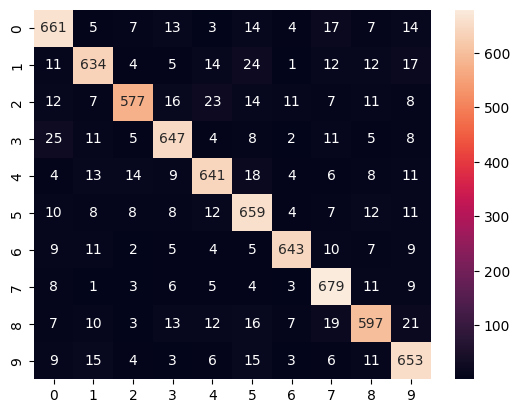

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=1)
i1 = Input(shape=(32,14))
x1 = BatchNormalization()(i1)
# First Convolutional Layer
x1 = Conv1D(64, kernel_size=10, activation='relu', padding='same')(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling1D(2)(x1)

# Second Convolutional Layer
x1 = Conv1D(128, kernel_size=5, activation='relu', padding='same')(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling1D(2)(x1)

x1 = LSTM(256,activation='tanh', return_sequences=True)(x1)
x1 = BatchNormalization()(x1)
x1 = Flatten()(x1)
x1 = Dense(400, activation='relu')(x1)
x1 = BatchNormalization()(x1)
x1 = Dense(300, activation='relu')(x1)
x1 = BatchNormalization()(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = Dropout(0.5)(x1)
output = Dense(10, activation='softmax')(x1)
model = Model(inputs=i1, outputs=output)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_accuracy', verbose=1, patience=10)
model.fit(X_train, y=to_categorical(Y_train), validation_split=0.2, epochs=500, batch_size=128, verbose=1, callbacks=[es])
pred = model.predict(X_test)
# Apply majority voting
Y_pred = np.argmax(pred, axis=1)  # Get the index of the class with the highest probability for each timestep
Y_pred_reshaped = Y_pred.reshape(-1, 1)  # Reshape to (num_samples, 1)
Y_pred_majority = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=Y_pred_reshaped)  # Apply majority voting along the samples axis

print(accuracy_score(Y_pred_majority, Y_test))
sns.heatmap(confusion_matrix(Y_test, Y_pred_majority), annot=True, fmt='g')